**Visualize Standard Resolution Community Earth System Model** </br>
This file features multiple plots of the Cloud Fraction data. </br>
By Anika Sharma, made in collaboration with ChatGPT AI </br>
Summer 2, 2025

In [1]:
import os
import xarray as xr
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as stats
import pandas as pd
import colormaps as cmaps
import cartopy.crs as ccrs

In [4]:
#custom colormap
import pickle

# Load the colormap
with open("fog_colormap.pkl", "rb") as f:
    fog_cmap = pickle.load(f)

In [3]:
cloud = xr.open_dataset("data/cesm_StdModel/cloud_std.nc")
cloud = cloud.CLOUD
cloud

<xarray.DataArray 'CLOUD' (time: 1032, lat: 192, lon: 288)> Size: 228MB
[57065472 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lev      float64 8B ...
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 8kB 1920-01-16 1920-02-13 ... 2005-12-16
    month    (time) int64 8kB ...
    year     (time) int64 8kB ...
Attributes:
    mdims:         1
    units:         fraction
    long_name:     Cloud fraction
    cell_methods:  time: mean

In [9]:
cloud_study = xr.open_dataset("data/cesm_StdModel/cloud_std_study.nc")
cloud_study = cloud_study.CLOUD
cloud_study

<xarray.DataArray 'CLOUD' (time: 600, lat: 192, lon: 288)> Size: 133MB
[33177600 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 5kB 1955-01-16 1955-02-13 ... 2004-12-16
    lev      float64 8B ...
    month    (time) int64 5kB ...
    year     (time) int64 5kB ...
Attributes:
    mdims:         1
    units:         fraction
    long_name:     Cloud fraction
    cell_methods:  time: mean

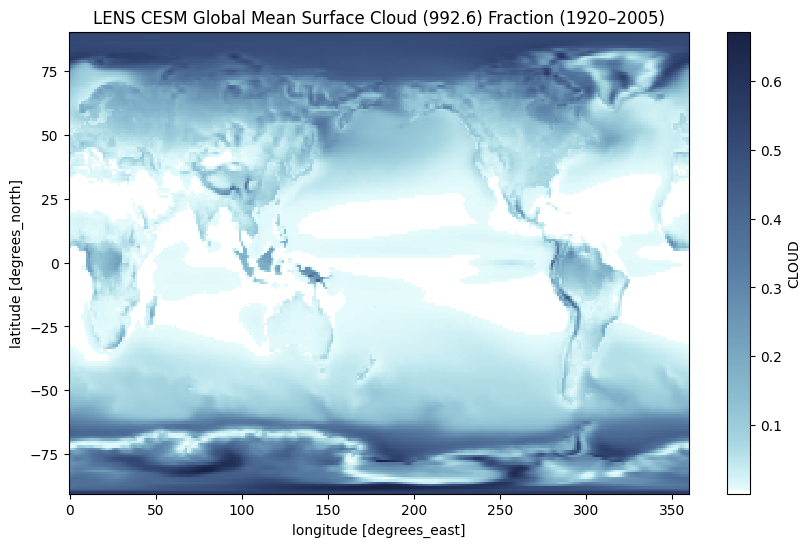

In [5]:
#cloud.mean('time').plot()

fig, ax = plt.subplots(figsize=(10, 6))
cloud.mean('time').plot(ax= ax, cmap = fog_cmap)
ax.set_title("LENS CESM Global Mean Surface Cloud (992.6) Fraction (1920–2005)")

plt.savefig("dataViz/LENS_Global_Mean_Map")
plt.show()

In [6]:
#Define Special Ranges

#left, right, bottom, top
#lon_min, lon_max, lat_min, lon_max
NEP = [190, 243, 21, 62]
#CA = [170,205, 115, 150]

**Seasonal Means**

In [10]:
def select_season(data, months, season_name):
    # Filter by month
    season_data = data.where(data.month.isin(months), drop=True)
    
    # For DJF, we need to handle the year roll
    if season_name == 'DJF':
        # Drop December of the last year to avoid incomplete season
        last_month = season_data.time[-1].dt.month.item()
        if last_month == 12:
            # Drop the last time entry if it's December
            season_data = season_data.isel(time=slice(0, -1))
        
    return season_data

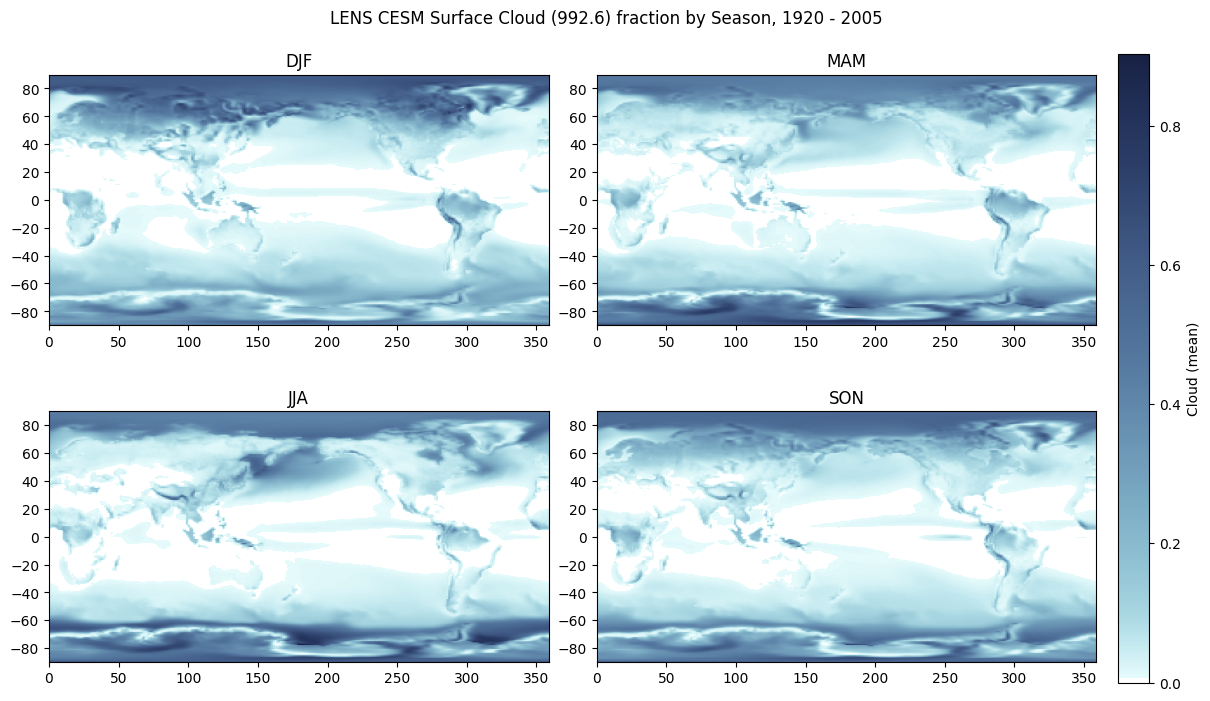

In [ ]:
#global seasonal mean total

djf = select_season(cloud, [12, 1, 2], "DJF").mean("time")
mam = select_season(cloud, [3, 4, 5], "MAM").mean("time")
jja = select_season(cloud, [6, 7, 8], "JJA").mean("time")
son = select_season(cloud, [9, 10, 11], "SON").mean("time")

djf_data = djf.values
mam_data = mam.values
jja_data = jja.values
son_data = son.values

# Coordinates (for labeling)
lat = djf['lat'].values
lon = djf['lon'].values

fig, axs = plt.subplots(2, 2, figsize=(12, 7), constrained_layout=True, gridspec_kw={'hspace': 0, 'wspace': 0})
fig.suptitle("LENS CESM Surface Cloud (992.6) fraction by Season, 1920 - 2005")

# Set shared color range (optional)
vmin = min(djf_data.min(), mam_data.min(), jja_data.min(), son_data.min())
vmax = max(djf_data.max(), mam_data.max(), jja_data.max(), son_data.max())

# Plot manually
im0 = axs[0, 0].imshow(djf_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = fog_cmap)
axs[0, 0].set_title("DJF")

im1 = axs[0, 1].imshow(mam_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = fog_cmap)
axs[0, 1].set_title("MAM")

im2 = axs[1, 0].imshow(jja_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = fog_cmap)
axs[1, 0].set_title("JJA")

im3 = axs[1, 1].imshow(son_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = fog_cmap)
axs[1, 1].set_title("SON")

fig.colorbar(im0, ax=axs, orientation='vertical', fraction=0.03, pad=0.02, label='Cloud (mean)')

plt.savefig("dataViz/LENS_Global_Seasonal_Map")
plt.show()



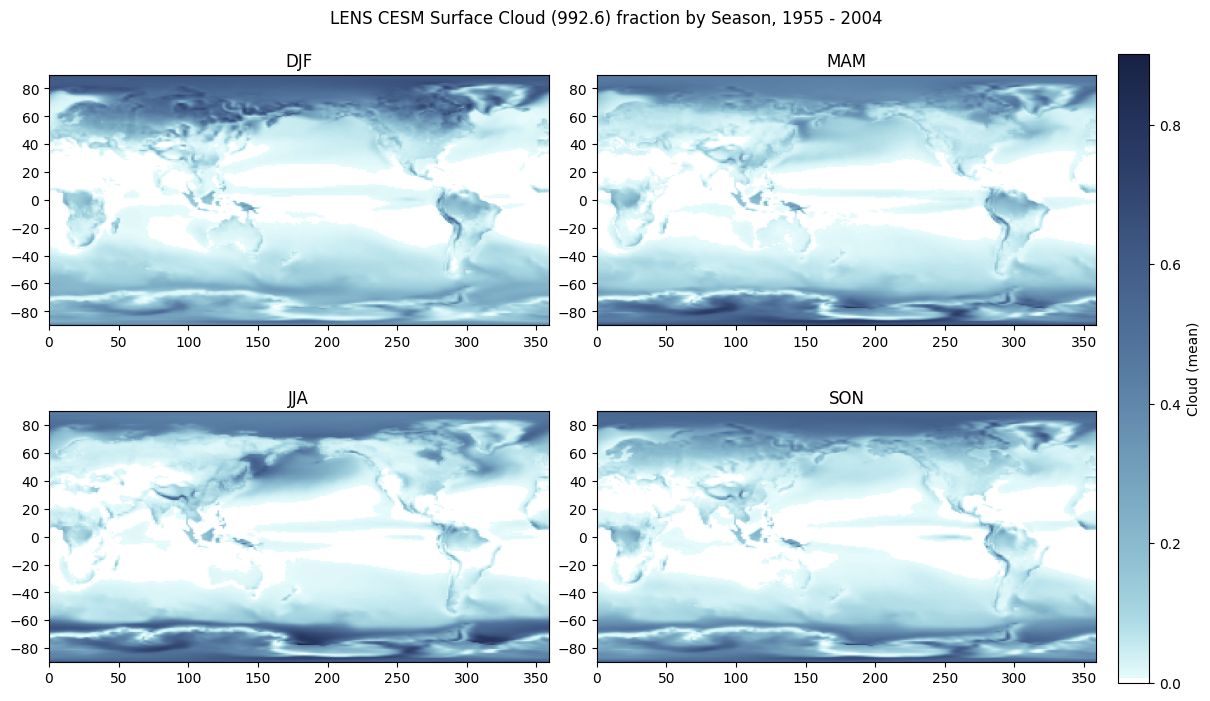

In [11]:
#global seasonal mean study (1955 - 2004)

djf = select_season(cloud_study, [12, 1, 2], "DJF").mean("time")
mam = select_season(cloud_study, [3, 4, 5], "MAM").mean("time")
jja = select_season(cloud_study, [6, 7, 8], "JJA").mean("time")
son = select_season(cloud_study, [9, 10, 11], "SON").mean("time")

djf_data = djf.values
mam_data = mam.values
jja_data = jja.values
son_data = son.values

# Coordinates (for labeling)
lat = djf['lat'].values
lon = djf['lon'].values

fig, axs = plt.subplots(2, 2, figsize=(12, 7), constrained_layout=True, gridspec_kw={'hspace': 0, 'wspace': 0})
fig.suptitle("LENS CESM Surface Cloud (992.6) fraction by Season, 1955 - 2004")

# Set shared color range (optional)
vmin = min(djf_data.min(), mam_data.min(), jja_data.min(), son_data.min())
vmax = max(djf_data.max(), mam_data.max(), jja_data.max(), son_data.max())

# Plot manually
im0 = axs[0, 0].imshow(djf_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = fog_cmap)
axs[0, 0].set_title("DJF")

im1 = axs[0, 1].imshow(mam_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = fog_cmap)
axs[0, 1].set_title("MAM")

im2 = axs[1, 0].imshow(jja_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = fog_cmap)
axs[1, 0].set_title("JJA")

im3 = axs[1, 1].imshow(son_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = fog_cmap)
axs[1, 1].set_title("SON")

fig.colorbar(im0, ax=axs, orientation='vertical', fraction=0.03, pad=0.02, label='Cloud (mean)')

plt.savefig("dataViz/LENS_study_Global_Seasonal_Map")
plt.show()



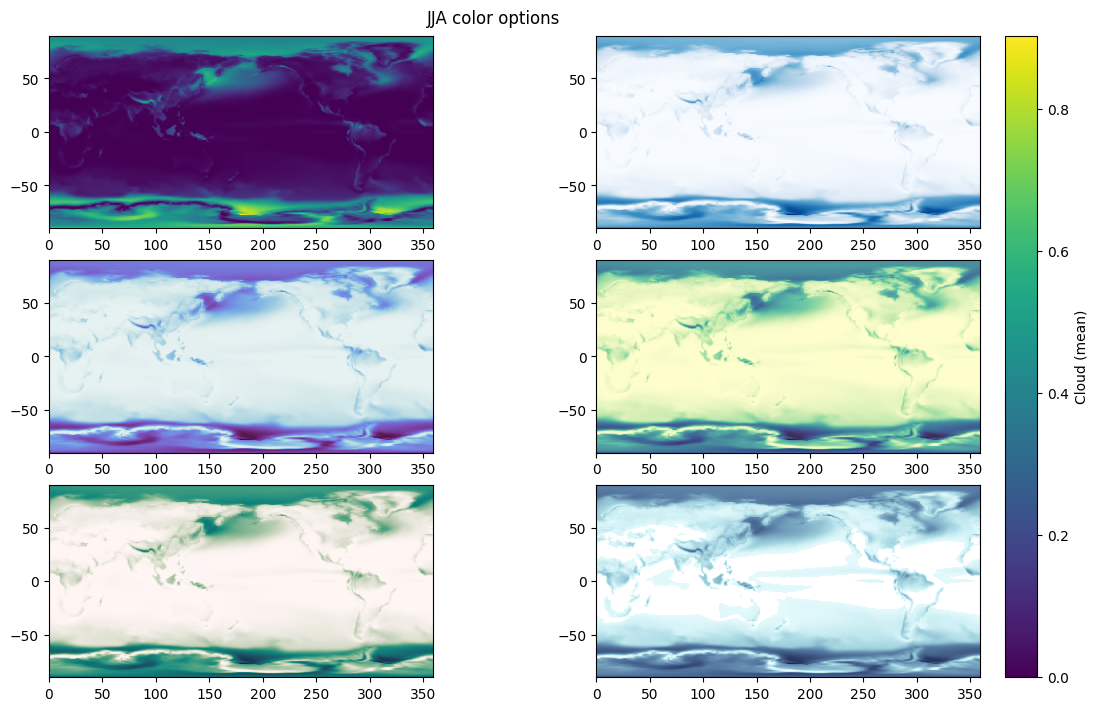

In [ ]:
#JJA Color options

"""djf = select_season(cloud, [12, 1, 2], "DJF").mean("time")
mam = select_season(cloud, [3, 4, 5], "MAM").mean("time")
jja = select_season(cloud, [6, 7, 8], "JJA").mean("time")
son = select_season(cloud, [9, 10, 11], "SON").mean("time")

djf_data = djf.values
mam_data = mam.values
jja_data = jja.values
son_data = son.values

# Coordinates (for labeling)
lat = djf['lat'].values
lon = djf['lon'].values

fig, axs = plt.subplots(3, 2, figsize=(12, 7), constrained_layout=True, gridspec_kw={'hspace': 0, 'wspace': 0})
fig.suptitle("JJA color options")

# Plot manually
im0 = axs[0, 0].imshow(jja_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()])


im1 = axs[0, 1].imshow(jja_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap='Blues')


im2 = axs[1, 0].imshow(jja_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = cmaps.dense)


im3 = axs[1, 1].imshow(jja_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = cmaps.deep)

im4 = axs[2, 0].imshow(jja_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = cmaps.tempo)

im5 = axs[2, 1].imshow(jja_data, origin='lower', vmin=vmin, vmax=vmax, extent=[lon.min(), lon.max(), lat.min(), lat.max()], cmap = fog_cmap)

fig.colorbar(im0, ax=axs, orientation='vertical', fraction=0.03, pad=0.02, label='Cloud (mean)')"""

[190, 243, 21, 62]


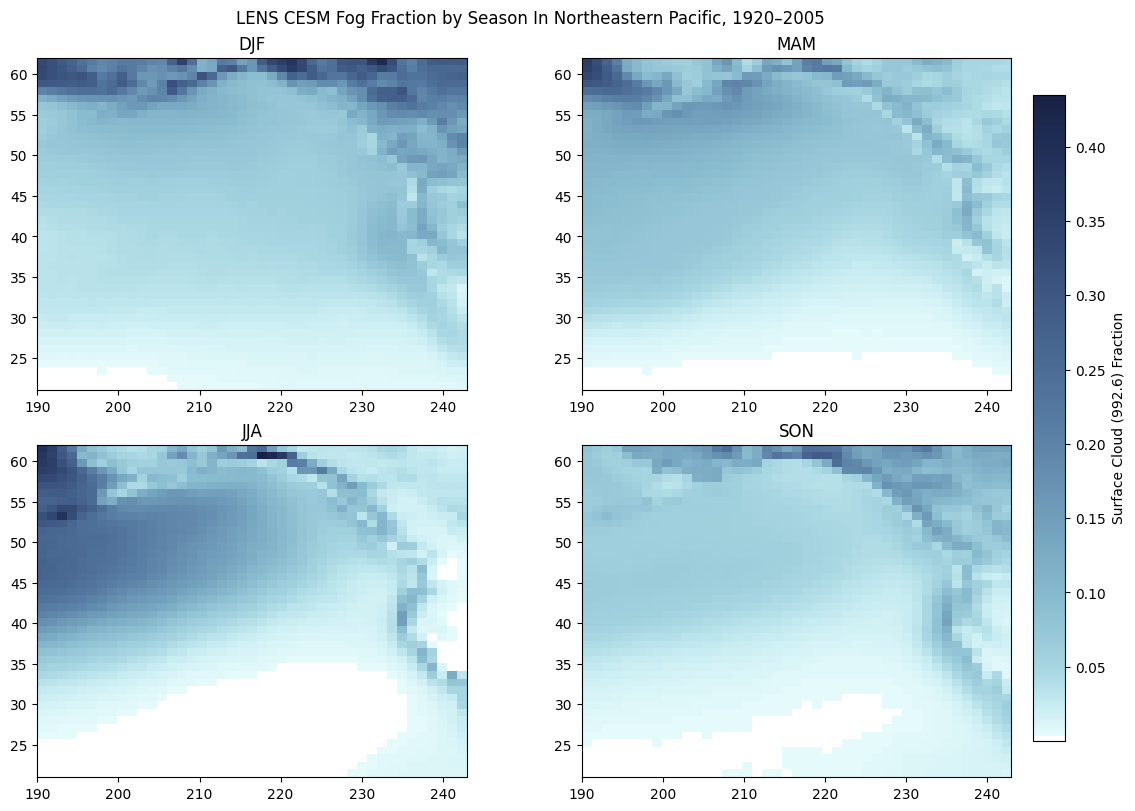

In [85]:
#Northeast Pacific Seasonal Mean

# Prepare figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
fig.suptitle("LENS CESM Fog Fraction by Season In Northeastern Pacific, 1920–2005")

# Define spatial bounds
lat_bounds = slice(NEP[2], NEP[3])
lon_bounds = slice(NEP[0], NEP[1])

# Seasonal arrays and titles
seasonal_data = [djf, mam, jja, son]
titles = ["DJF", "MAM", "JJA", "SON"]

# Subset and compute vmin/vmax from the selected region
subsets = [s.sel(lat=lat_bounds, lon=lon_bounds) for s in seasonal_data]
vmin = min(s.min().item() for s in subsets)
vmax = max(s.max().item() for s in subsets)

#extent = [subsets[1].lon.values.min(), subsets[1].lon.values.max(), subsets[1].lat.values.min(), subsets[1].lat.values.max()]
extent = [NEP[0], NEP[1], NEP[2], NEP[3]]

print(extent)

# Plot all 4 subplots in a loop
for ax, data, title in zip(axs.flat, subsets, titles):
    im = ax.imshow(data.values, origin='lower', vmin=vmin, vmax=vmax, extent=extent, cmap = fog_cmap)
    ax.set_title(title)

# Shared colorbar
fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.03, pad=0.02, label='Surface Cloud (992.6) Fraction')

plt.savefig("dataViz/LENS_NEP_Seasonal_Map")
plt.show()


In [ ]:
"""#Northeast Pacific Coast Seasonal Mean 
#incorrect scale

# Prepare figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
fig.suptitle("LENS CESM Surface Cloud (992.6) Fraction by Season In Northeastern Pacific Coast, 1920–2005")

# Define spatial bounds
lat_bounds = slice(CA[2] - 90, CA[3] - 90)
lon_bounds = slice(CA[0], CA[1])

# Seasonal arrays and titles
seasonal_data = [djf, mam, jja, son]
titles = ["DJF", "MAM", "JJA", "SON"]

# Subset and compute vmin/vmax from the selected region
subsets = [s.sel(lat=lat_bounds, lon=lon_bounds) for s in seasonal_data]
vmin = min(s.min().item() for s in subsets)
vmax = max(s.max().item() for s in subsets)

# Plot all 4 subplots in a loop
for ax, data, title in zip(axs.flat, seasonal_data, titles):
    im = ax.imshow(data.values, origin='lower', vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.set_xlim(CA[0], CA[1])
    ax.set_ylim(CA[2], CA[3])

# Shared colorbar
fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.03, pad=0.02, label='Cloud (mean)')

plt.savefig("dataViz/LENS_NEPCoast_Seasonal_Map")
plt.show()"""

**Time Series**

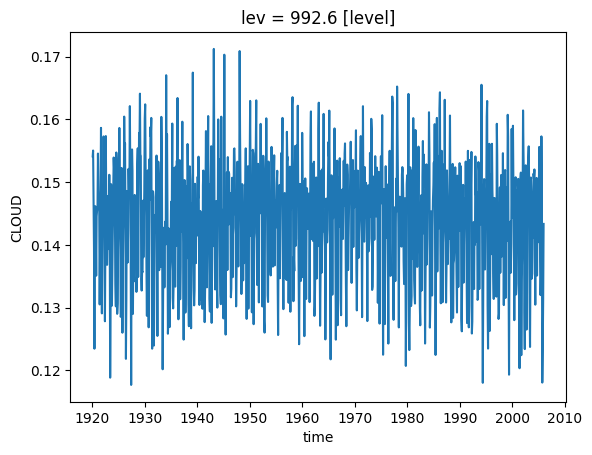

In [125]:
cloud.mean(dim=["lat", "lon"]).plot()

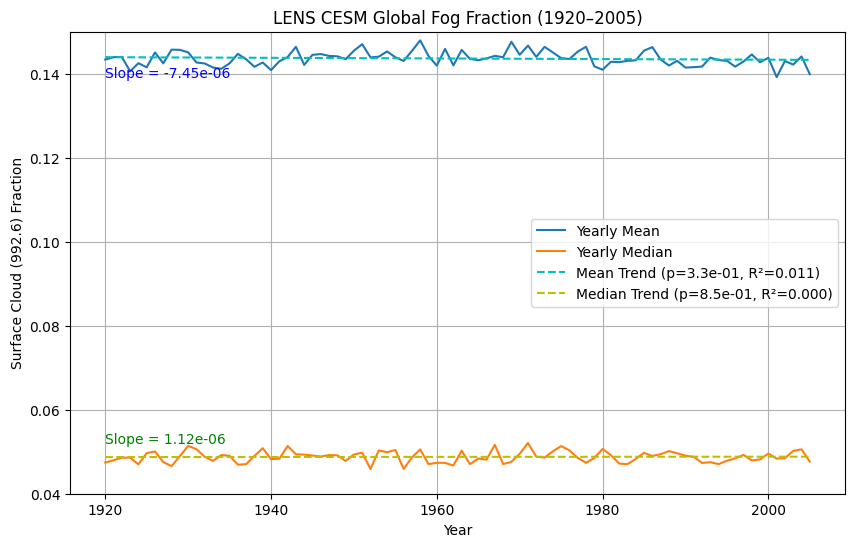

In [ ]:
#yearly global mean time series 1920 - 2005

# fog across map per yr
yrly_cloud_mean = cloud.mean(dim=["lat", "lon"]).groupby("year").mean(dim="time")
yrly_cloud_median = cloud.median(dim=["lat", "lon"]).groupby("year").median(dim="time")

# Extract year and values
x_mean = yrly_cloud_mean['year'].values
y_mean = yrly_cloud_mean.values

x_median = yrly_cloud_median['year'].values
y_median = yrly_cloud_median.values # array of arrays

# Linear regression
slope_mean, intercept, r_value, p_value_mean, std_err = stats.linregress(x_mean, y_mean)
r_squared_mean = r_value**2
# Compute trend 
trend_line_mean = slope_mean * x_mean + intercept #x is an array so trend_line is array

# Linear regression
slope_median, intercept, r_value, p_value_median, std_err = stats.linregress(x_median, y_median)
r_squared_median = r_value**2
# Compute trend 
trend_line_median = slope_median * x_median + intercept #x is an array so trend_line is array


# Plot
fig, ax = plt.subplots(figsize=(10, 6))

yrly_cloud_mean.plot(ax=ax, label="Yearly Mean")
yrly_cloud_median.plot(ax=ax, label="Yearly Median")
ax.plot(x_mean, trend_line_mean, 'c--', label=f"Mean Trend (p={p_value_mean:.1e}, R²={r_squared_mean:.3f})")
ax.plot(x_median, trend_line_median, 'y--', label=f"Median Trend (p={p_value_median:.1e}, R²={r_squared_median:.3f})")

# Annotations
ax.set_title("LENS CESM Global Fog Fraction (1920–2005)")
ax.set_xlabel("Year")
ax.set_ylabel("Surface Cloud (992.6) Fraction")
ax.set_ylim((.04, .15))
ax.legend()
ax.grid(True)

text = f"Slope = {slope_mean:.2e}"
ax.text(1920, y_mean.min(), text, color='b')

text = f"Slope = {slope_median:.2e}"
ax.text(1920, y_median.max(), text, color='g')

plt.savefig("dataViz/LENS_Global_Yrly_TimeSeries")
plt.show()


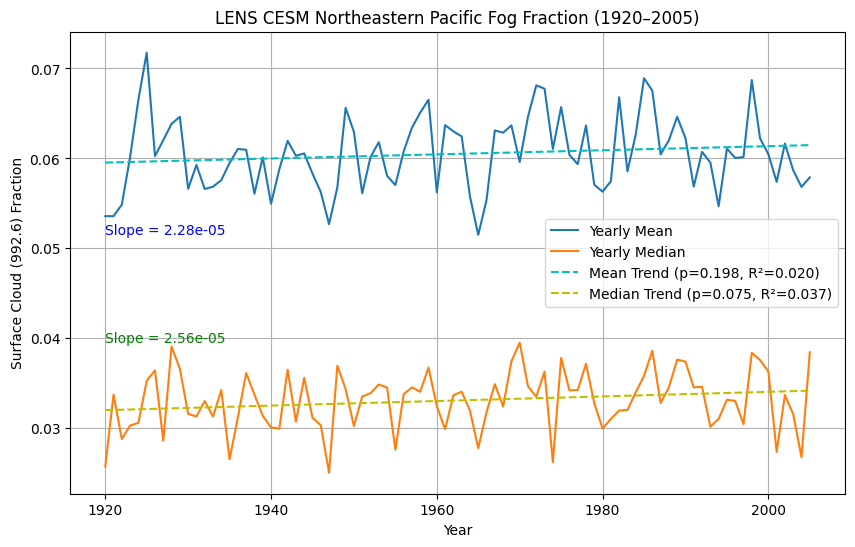

In [ ]:
#yearly mean for NEP
lat_bounds = slice(NEP[2], NEP[3])
lon_bounds = slice(NEP[0], NEP[1])
NEP_cloud = cloud.sel(lat=lat_bounds, lon=lon_bounds)
#NEP_cloud.mean("time").plot()

yrly_NEP_mean = NEP_cloud.mean(dim=["lat", "lon"]).groupby("year").mean(dim="time")
yrly_NEP_median = NEP_cloud.median(dim=["lat", "lon"]).groupby("year").median(dim="time")

# Extract year and values
x_mean = yrly_NEP_mean['year'].values
y_mean = yrly_NEP_mean.values

x_median = yrly_NEP_median['year'].values
y_median = yrly_NEP_median.values # array of arrays

# Linear regression
slope_mean, intercept, r_value, p_value_mean, std_err = stats.linregress(x_mean, y_mean)
r_squared_mean = r_value**2
# Compute trend 
trend_line_mean = slope_mean * x_mean + intercept #x is an array so trend_line is array

# Linear regression
slope_median, intercept, r_value, p_value_median, std_err = stats.linregress(x_median, y_median)
r_squared_median = r_value**2
# Compute trend 
trend_line_median = slope_median * x_median + intercept #x is an array so trend_line is array


# Plot
fig, ax = plt.subplots(figsize=(10, 6))

yrly_NEP_mean.plot(ax=ax, label="Yearly Mean")
yrly_NEP_median.plot(ax=ax, label="Yearly Median")
ax.plot(x_mean, trend_line_mean, 'c--', label=f"Mean Trend (p={p_value_mean:.3f}, R²={r_squared_mean:.3f})")
ax.plot(x_median, trend_line_median, 'y--', label=f"Median Trend (p={p_value_median:.3f}, R²={r_squared_median:.3f})")

# Annotations
ax.set_title("LENS CESM Northeastern Pacific Fog Fraction (1920–2005)")
ax.set_xlabel("Year")
ax.set_ylabel("Surface Cloud (992.6) Fraction")
#ax.set_ylim((.04, .15))
ax.legend()
ax.grid(True)

text = f"Slope = {slope_mean:.2e}"
ax.text(1920, y_mean.min(), text, color='b')

text = f"Slope = {slope_median:.2e}"
ax.text(1920, y_median.max(), text, color='g')

plt.savefig("dataViz/LENS_NEP_Yrly_TimeSeries")
plt.show()


In [ ]:
#top and mid thirds globally

# ===== Step 1: Compute monthly mean for top 33.3% and mid 33.3% =====
top_third_means = []
mid_third_means = []
years = []

for t in cloud.time:
    monthValues = cloud.sel(time=t).values.flatten()

    if len(monthValues) == 0:
        continue

    # Compute thresholds
    p33 = np.percentile(monthValues, 33.3)
    p66 = np.percentile(monthValues, 66.6)

    # Group and average
    top_mean = monthValues[monthValues > p66].mean()
    mid_mean = monthValues[(monthValues >= p33) & (monthValues <= p66)].mean()

    top_third_means.append(top_mean)
    mid_third_means.append(mid_mean)
    years.append(pd.to_datetime(str(t.values)).year)

# ===== Step 2: Make dataframe and compute yearly mean =====
df = pd.DataFrame({
    "year": years,
    "top_33": top_third_means,
    "mid_33": mid_third_means
})

yrly_top33 = df.groupby("year")["top_33"].mean()
yrly_mid33 = df.groupby("year")["mid_33"].mean()

# ===== Step 3: Trend lines =====
x_top = yrly_top33.index.values
y_top = yrly_top33.values
slope_top, intercept_top, r_top, p_top, stderr_top = stats.linregress(x_top, y_top)
trend_top = slope_top * x_top + intercept_top
r2_top = r_top**2

x_mid = yrly_mid33.index.values
y_mid = yrly_mid33.values
slope_mid, intercept_mid, r_mid, p_mid, stderr_mid = stats.linregress(x_mid, y_mid)
trend_mid = slope_mid * x_mid + intercept_mid
r2_mid = r_mid**2

# ===== Step 4: Plot =====
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_top, y_top, label="Yearly Top 33.3% Mean", color="red")
ax.plot(x_mid, y_mid, label="Yearly Mid 33.3% Mean", color="orange")

ax.plot(x_top, trend_top, 'b--', label=f"Top Trend (p={p_top:.1e}, R²={r2_top:.3f})")
ax.plot(x_mid, trend_mid, 'g--', label=f"Mid Trend (p={p_mid:.1e}, R²={r2_mid:.3f})")

# ===== Annotations and labels =====
ax.set_title("LENS CESM Fog Fraction (Top & Mid 33.3%), 1920–2005")
ax.set_xlabel("Year")
ax.set_ylabel("Surface Cloud (992.6) Fraction")
ax.grid(True)
ax.legend()

# Trend text
ax.text(1920, y_top.min(), f"Slope = {slope_top:.2e}", color='red')
ax.text(1920, y_mid.max(), f"Slope = {slope_mid:.2e}", color='orange')

plt.savefig("dataViz/LENS_Global_TopMid33_TimeSeries")
plt.show()


In [ ]:
#5 - 30 percentiles

# Define the percentile cutoffs and labels
percentiles = [95, 90, 80, 70]
labels = ["Top 5%", "5–10%", "10–20%", "20–30%"]

# Initialize dictionary to store results
monthly_data = {label: [] for label in labels}
years = []

# Step 1: Loop through time and compute percentile-band means
for t in cloud.time:
    data = cloud.sel(time=t)
    values = data.values.flatten()
    values = values[~np.isnan(values)]
    if len(values) == 0:
        continue

    p = np.percentile(values, percentiles)

    # Get band means
    monthly_data["Top 5%"].append(np.mean(values[values > p[0]]))
    monthly_data["5–10%"].append(np.mean(values[(values > p[1]) & (values <= p[0])]))
    monthly_data["10–20%"].append(np.mean(values[(values > p[2]) & (values <= p[1])]))
    monthly_data["20–30%"].append(np.mean(values[(values > p[3]) & (values <= p[2])]))
    years.append(pd.to_datetime(str(t.values)).year)

# Step 2: Build a DataFrame and group by year
df = pd.DataFrame(monthly_data)
df["year"] = years
yearly_means = df.groupby("year").mean()

# Step 3: Plot all bands and their trend lines
fig, ax = plt.subplots(figsize=(10, 6))

for label in labels:
    y = yearly_means[label].values
    x = yearly_means.index.values

    # Plot time series
    ax.plot(x, y, label=label)

    # Linear regression
    slope, intercept, r_value, p_value, _ = stats.linregress(x, y)
    trend = slope * x + intercept
    ax.plot(x, trend, linestyle="--", label=f"{label} Trend (p={p_value:.1e}, R²={r_value**2:.3f})")
    ax.text(1920, y.max(), f"Slope = {slope:.2e}", color='red')

# Step 4: Formatting
ax.set_title("Trend in Cloud Fraction Percentile Bands (1920–2005)")
ax.set_xlabel("Year")
ax.set_ylabel("Cloud Fraction")
ax.grid(True)
ax.legend()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("dataViz/LENS_Global_Yrly_TopPercentileBands_Trend")
plt.show()

In [ ]:
#5 - 100 percentiles

# Define the percentile cutoffs and labels
percentiles = [90, 80, 50, 30]
labels = ["Top 10%", "10–20%", "20–50%", "50-70%"]

# Initialize dictionary to store results
monthly_data = {label: [] for label in labels}
years = []

# Step 1: Loop through time and compute percentile-band means
for t in cloud.time:
    data = cloud.sel(time=t)
    values = data.values.flatten()
    values = values[~np.isnan(values)]
    if len(values) == 0:
        continue

    p = np.percentile(values, percentiles)

    # Get band means
    monthly_data[labels[0]].append(np.mean(values[values > p[0]]))
    monthly_data[labels[1]].append(np.mean(values[(values > p[1]) & (values <= p[0])]))
    monthly_data[labels[2]].append(np.mean(values[(values > p[2]) & (values <= p[1])]))
    monthly_data[labels[3]].append(np.mean(values[(values > p[3]) & (values <= p[2])]))
    years.append(pd.to_datetime(str(t.values)).year)

# Step 2: Build a DataFrame and group by year
df = pd.DataFrame(monthly_data)
df["year"] = years
yearly_means = df.groupby("year").mean()

# Step 3: Plot all bands and their trend lines
fig, ax = plt.subplots(figsize=(10, 6))

for label in labels:
    y = yearly_means[label].values
    x = yearly_means.index.values

    # Plot time series
    ax.plot(x, y, label=label)

    # Linear regression
    slope, intercept, r_value, p_value, _ = stats.linregress(x, y)
    trend = slope * x + intercept
    ax.plot(x, trend, linestyle="--", label=f"{label} Trend (p={p_value:.1e}, R²={r_value**2:.3f})")
    ax.text(1920, y.max(), f"Slope = {slope:.2e}", color='red')

# Step 4: Formatting
ax.set_title("Trend in Cloud Fraction Percentile Bands (1920–2005)")
ax.set_xlabel("Year")
ax.set_ylabel("Cloud Fraction")
ax.grid(True)
ax.legend()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("dataViz/LENS_Global_Yrly_TotalPercentileBands_Trend")
plt.show()

**Histogram of Fraction** </br>
*aka fraction on the x axis and occurance on the y axis*

In [ ]:
#global, mean per cell across all yrs

globalMean = cloud.mean("time")
x = globalMean.values
counts, bins = np.histogram(x, "scott")
plt.hist(bins[:-1], bins, weights=counts/counts.sum())

plt.title("Global Mean Fog Fraction Distribution, (1920 - 2005)")
plt.xlabel("Fog Fraction")
plt.ylabel("Relative Frequency")

plt.savefig("dataViz/LENS_Global_FogFraction_Distribution")
plt.show()


In [ ]:
#NEP

NEPMean = NEP_cloud.mean("time")
x = NEPMean.values
counts, bins = np.histogram(x, "sqrt")
plt.hist(bins[:-1], bins, weights=counts/counts.sum())

plt.title("Northeastern Pacific Mean Fog Fraction Distribution, (1920 - 2005)")
plt.xlabel("Fog Fraction")
plt.ylabel("Relative Frequency")

plt.savefig("dataViz/LENS_NEP_FogFraction_Distribution")
plt.show()

In [260]:
#transparent - global histogram 1920 - 1940, 1941-1961, 1962-1982, 1983-2005

globalMean_1920_40 = cloud.where((cloud['year'] >= 1920) & (cloud['year'] <= 1940), drop=True).mean(dim='time', skipna=True)
globalMean_1941_61 = cloud.where((cloud['year'] >= 1941) & (cloud['year'] <= 1961), drop=True).mean(dim='time', skipna=True)
globalMean_1962_82 = cloud.where((cloud['year'] >= 1962) & (cloud['year'] <= 1982), drop=True).mean(dim='time', skipna=True)
globalMean_1983_2005 = cloud.where((cloud['year'] >= 1983) & (cloud['year'] <= 2005), drop=True).mean(dim='time', skipna=True)

Text(0, 0.5, 'Relative Frequency')

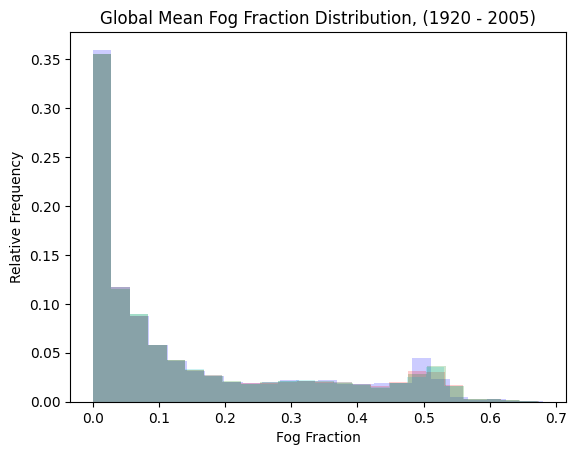

In [262]:
counts, bins = np.histogram(globalMean_1920_40.values, "doane")
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('b', 0.2))

counts, bins = np.histogram(globalMean_1941_61.values, "doane")
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('r', 0.2))

counts, bins = np.histogram(globalMean_1962_82.values, "doane")
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('g', 0.2))

counts, bins = np.histogram(globalMean_1983_2005.values, "doane")
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('c', 0.2))

plt.title("Global Mean Fog Fraction Distribution, (1920 - 2005)")
plt.xlabel("Fog Fraction")
plt.ylabel("Relative Frequency")


/var/folders/4m/h1r7bv6s65ggpt8gzk616wyh0000gn/T/ipykernel_57916/146350820.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'Relative Frequency')

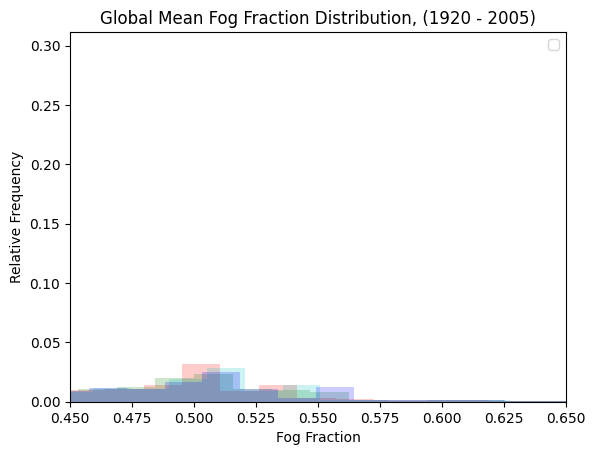

In [308]:
counts, bins = np.histogram(globalMean_1920_40.values, "scott")
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('r', 0.2))

counts, bins = np.histogram(globalMean_1941_61.values, "scott")
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('g', 0.2))

counts, bins = np.histogram(globalMean_1962_82.values, "scott")
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('c', 0.2))

counts, bins = np.histogram(globalMean_1983_2005.values, "scott")
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('b', 0.2))

plt.xlim(.45, .65)
plt.legend()

plt.title("Global Mean Fog Fraction Distribution, (1920 - 2005)")
plt.xlabel("Fog Fraction")
plt.ylabel("Relative Frequency")

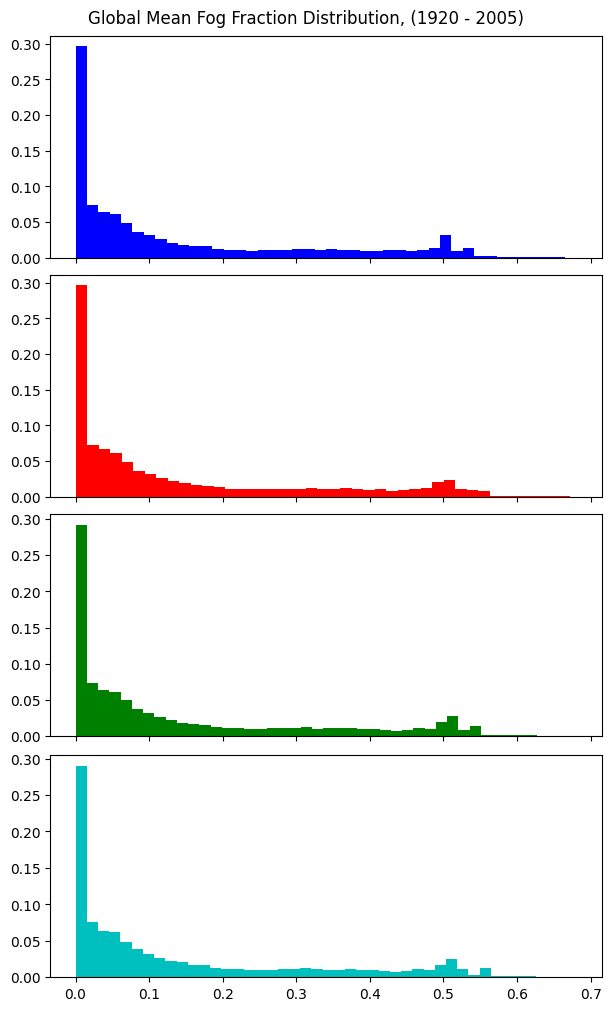

In [275]:
fig, axs = plt.subplots(4,1, figsize = (6, 10), sharex=True, layout = "compressed")

counts, bins = np.histogram(globalMean_1920_40.values, "scott")
axs[0].hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('b'))

counts, bins = np.histogram(globalMean_1941_61.values, "scott")
axs[1].hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('r'))

counts, bins = np.histogram(globalMean_1962_82.values, "scott")
axs[2].hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('g'))

counts, bins = np.histogram(globalMean_1983_2005.values, "scott")
axs[3].hist(bins[:-1], bins, weights=counts/counts.sum(), color = ('c'))

fig.suptitle("Global Mean Fog Fraction Distribution, (1920 - 2005)")

plt.show()

**Change in Fog - over study period** </br>
*map of where fog has increased an decreased over time*

In [12]:
#mean map per yr
yrly_mean_cloud = cloud_study.groupby("year").mean(dim="time")

In [13]:
time_x = list (range(len(yrly_mean_cloud["year"])))

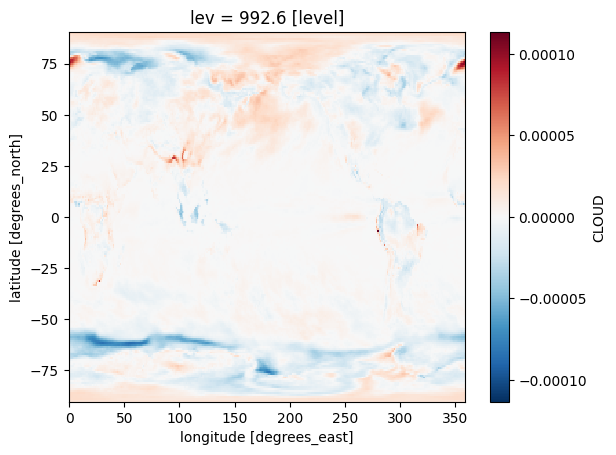

In [ ]:
"""#testing

#cloud [time, lat, lon] -> [1032, 192, 288]
#for each cell in lat and lon, get the linear regression slope


def linreg_slope(y):
    slope, intercept, r_value, p_value, _ = stats.linregress(time_x, y)
    return slope

# Apply function over lat/lon
slopes_df = xr.apply_ufunc(
    linreg_slope,
    cloud,
    input_core_dims=[['time']],
    vectorize=True,
)

slopes_df.plot()"""



In [ ]:
"""#the way to sanity check this is to do it one by one

# Prepare empty array to store slopes
slope_array = np.full((cloud.lat.size, cloud.lon.size), np.nan)

# Loop over each lat-lon grid point
for i in range(cloud.lat.size):
    for j in range(cloud.lon.size):
        y = cloud[:, i, j].values  # time series at one grid point
        slope, intercept, r_value, p_value, _ = stats.linregress(time_x, y)
        slope_array[i, j] = slope
        

# Create a new DataArray for the slope
slope_da = xr.DataArray(
    slope_array,
    coords={'lat': cloud.lat, 'lon': cloud.lon},
    dims=['lat', 'lon'],
    name='slope'
)

slope_da.plot()"""


In [14]:
#make global slope data, remove insignificant (optional)

def linreg_slope(y):
    slope, intercept, r_value, p_value, _ = stats.linregress(time_x, y)
    return slope, intercept, r_value, p_value

# Apply function over lat/lon
results = xr.apply_ufunc(
    linreg_slope,
    yrly_mean_cloud,
    input_core_dims=[['year']],
    output_core_dims=[[], [], [], []],
    vectorize=True,
    output_dtypes=[float, float, float, float],
)

# Unpack into separate DataArrays
slope, intercept, rvalue, pvalue = results

# Optionally, assign names
slope.name = 'slope'
intercept.name = 'intercept'
rvalue.name = 'r_value'
pvalue.name = 'p_value'

# Mask non-significant slopes
slope_masked = slope.where(pvalue < 0.05)

In [ ]:
"""#significant color map w/ cartopy

# Step 2: Create a masked array (for pcolormesh to honor gray for NaNs)
data = slope_masked.values
data = np.ma.masked_invalid(data)  # mask NaNs

# Step 3: Setup color map
cmap = plt.get_cmap('RdBu')
cmap.set_bad('darkgray')       # Set color for NaNs

# Step 4: Get lon/lat mesh
lon, lat = np.meshgrid(slope.lon, slope.lat)

# Step 5: Plot with Cartopy
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})


# Add map features

ax.coastlines(linewidth=0.2)
gl = ax.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot data
im = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                   cmap=cmap,
                   shading='auto',
                   vmin=-np.nanmax(abs(data)),
                   vmax=np.nanmax(abs(data)))

fig.text(0.7, 0.1, 'Gray = Not Significant (p value < 0.05)', fontsize=9, ha='right')

# Colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='Fog Fraction Trend Slope', format = "%.1e")

plt.title('Fog Trend Slope Map (1920 - 2005)', fontsize=14)
plt.savefig("dataViz/LENS_Global_FogFractionTrend")
plt.show()"""


NameError: name 'slope_masked' is not defined

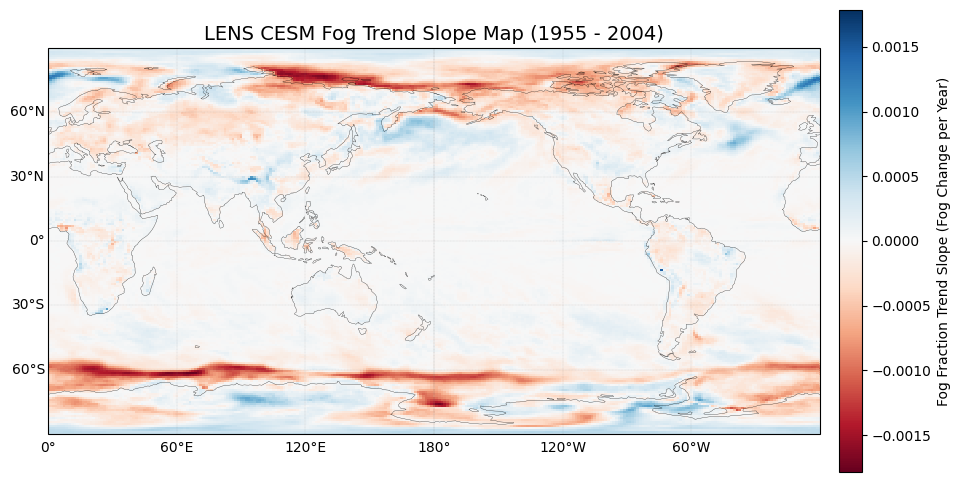

In [16]:
#map w/ cartopy

data = slope.values

# Step 3: Setup color map
cmap = plt.get_cmap('RdBu')

# Step 4: Get lon/lat mesh
lon, lat = np.meshgrid(slope.lon, slope.lat)

# Step 5: Plot with Cartopy
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})


# Add map features

ax.coastlines(linewidth=0.2)
gl = ax.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Plot data
im = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                   cmap=cmap,
                   shading='auto',
                   vmin=-np.nanmax(abs(data)),
                   vmax=np.nanmax(abs(data)))

# Colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='Fog Fraction Trend Slope (Fog Change per Year)', pad = 0.02)

plt.title('LENS CESM Fog Trend Slope Map (1955 - 2004)', fontsize=14)
plt.savefig("dataViz/LENS_Global_FogFractionTrend")
plt.show()